<h1 style="color: blue; font-weight: bold;"> From Data to Decisions: Classifying Man of the Match in IPL </h1>


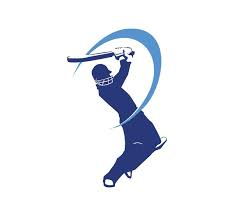 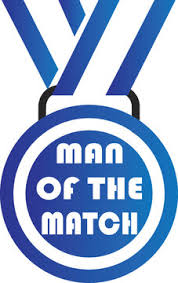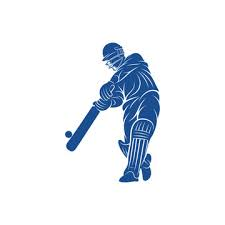

#### <span style="color:blue">Name: Muhsina CT</span>  
#### <span style="color:blue">Organization: Entri Elevate</span>  
#### <span style="color:blue">Date: 25th Sept 2024</span>

## <span style="color:#008080">1. <strong> Overview of Problem Statement</strong></span>

This project aims to develop a classification model to identify the "Man of the Match" in Indian Premier League (IPL) cricket matches based on player performance metrics.

## <span style="color:#008080">2. <strong>Objective:</strong></span>


To develop an effective classification model that predicts the likelihood of a player being awarded "Man of the Match" based on various match and player features.

## <span style="color:#008080">3. <strong>Data Description:</strong></span>


##### Source: https://data.world/mkhuzaima/ipl-data-till-2017
##### **Table : Player_match.csv**
- **Player_match_SK**: Unique identifier for the player match.
- **PlayerMatch_key**: Key for the player-match combination.
- **Match_Id**: Unique identifier for the match.
- **Player_Id**: Player's ID.
- **Player_Name**: Player's name.
- **DOB**: Date of birth.
- **Batting_hand**: Batting hand of the player.
- **Bowling_skill**: Bowling skill of the player.
- **Country_Name**: Player's country.
- **Role_Desc**: Player's role in the match (e.g., bowler, batsman).
- **Player_team**: Team the player belongs to.
- **Opposit_Team**: Opponent team.
- **Season_year**: Year of the match.
- **is_manofThematch**: Target variable - whether the player was "Man of the Match."
- **Age_As_on_match**: Player's age during the match.
- **IsPlayers_Team_won**: Whether the player's team won the match.
- **Batting_Status**: Player's batting status in the match.
- **Bowling_Status**: Player's bowling status in the match.
- **Player_Captain**: Whether the player was the captain in the match.
- **Opposit_captain**: Opponent team's captain.
- **Player_keeper**: Whether the player was the wicketkeeper in the match.
- **Opposit_keeper**: Opponent team's wicketkeeper.

## <span style="color:#008080">4. <strong>Data Collection:</strong></span>



In [1]:
# Import library
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/user/Downloads/Player_match.csv', encoding='ISO-8859-1')

In [3]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(13992, 22)


In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Player_match_SK  PlayerMatch_key  Match_Id  Player_Id Player_Name  \
0            12694      33598700006    335987          6    R Dravid   
1            12695      33598700007    335987          7    W Jaffer   
2            12696      33598700008    335987          8     V Kohli   
3            12697      33598700009    335987          9   JH Kallis   
4            12698      33598700010    335987         10    CL White   

          DOB    Batting_hand          Bowling_skill  Country_Name Role_Desc  \
0   1/11/1973  Right-hand bat     Right-arm offbreak         India   Captain   
1   2/16/1978  Right-hand bat     Right-arm offbreak         India    Player   
2   11/5/1988  Right-hand bat       Right-arm medium         India    Player   
3  10/16/1975  Right-hand bat  Right-arm fast-medium  South Africa    Player   
4   8/18/1983  Right-hand bat        Legbreak googly     Australia    Player   

   ... Season_year is_manofThematch  Age_As_on_match  I

In [5]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13992 entries, 0 to 13991
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_match_SK     13992 non-null  int64  
 1   PlayerMatch_key     13992 non-null  int64  
 2   Match_Id            13992 non-null  int64  
 3   Player_Id           13992 non-null  int64  
 4   Player_Name         13992 non-null  object 
 5   DOB                 13992 non-null  object 
 6   Batting_hand        13992 non-null  object 
 7   Bowling_skill       12862 non-null  object 
 8   Country_Name        13992 non-null  object 
 9   Role_Desc           13992 non-null  object 
 10  Player_team         13992 non-null  object 
 11  Opposit_Team        13992 non-null  object 
 12  Season_year         13992 non-null  int64  
 13  is_manofThematch    13992 non-null  bool   
 14  Age_As_on_match     13992 non-null  int64  
 15  IsPlayers_Team_won  13992 non-n

In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Player_match_SK  PlayerMatch_key      Match_Id     Player_Id  \
count     13992.000000     1.399200e+04  1.399200e+04  13992.000000   
mean      19689.500000     6.369402e+10  6.371833e+05    168.744282   
std        4039.286818     2.345177e+10  2.349778e+05    129.450143   
min       12694.000000     3.359870e+10  3.359870e+05      1.000000   
25%       16191.750000     4.191548e+10  4.191548e+05     56.000000   
50%       19689.500000     5.483825e+10  5.483825e+05    136.000000   
75%       23187.250000     8.297465e+10  8.297465e+05    267.000000   
max       26685.000000     1.080000e+11  1.082650e+06    497.000000   

        Season_year  Age_As_on_match  Batting_Status  Bowling_Status  
count  13992.000000     13992.000000             0.0             0.0  
mean    2012.490566        28.349057             NaN             NaN  
std        2.770944         4.805585             NaN             NaN  
min     2008.000000        17.000000             NaN   

In [7]:
print("\nDistribution of 'is_manofThematch':")
print(df['is_manofThematch'].value_counts(normalize=True))


Distribution of 'is_manofThematch':
is_manofThematch
False    0.954903
True     0.045097
Name: proportion, dtype: float64


## <span style="color:#008080">5. Data Preprocessing - Data Cleaning:</span>


In [8]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Player_match_SK           0
PlayerMatch_key           0
Match_Id                  0
Player_Id                 0
Player_Name               0
DOB                       0
Batting_hand              0
Bowling_skill          1130
Country_Name              0
Role_Desc                 0
Player_team               0
Opposit_Team              0
Season_year               0
is_manofThematch          0
Age_As_on_match           0
IsPlayers_Team_won        0
Batting_Status        13992
Bowling_Status        13992
Player_Captain            0
Opposit_captain           0
Player_keeper             0
Opposit_keeper            0
dtype: int64


In [10]:
# Drop 
columns_to_drop = ['Bowling_skill', 'Batting_Status', 'Bowling_Status']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
# Convert DOB to datetime
df['DOB'] = pd.to_datetime(df['DOB'])

# Extract year from DOB
df['Year_of_Birth'] = df['DOB'].dt.year

# Drop the original DOB 
df.drop(columns=['DOB'], inplace=True)

In [12]:
print(df.isnull().sum())

Player_match_SK       0
PlayerMatch_key       0
Match_Id              0
Player_Id             0
Player_Name           0
Batting_hand          0
Country_Name          0
Role_Desc             0
Player_team           0
Opposit_Team          0
Season_year           0
is_manofThematch      0
Age_As_on_match       0
IsPlayers_Team_won    0
Player_Captain        0
Opposit_captain       0
Player_keeper         0
Opposit_keeper        0
Year_of_Birth         0
dtype: int64


In [13]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_player_data.csv', index=False)

In [14]:
df_cleaned = pd.read_csv('cleaned_player_data.csv')

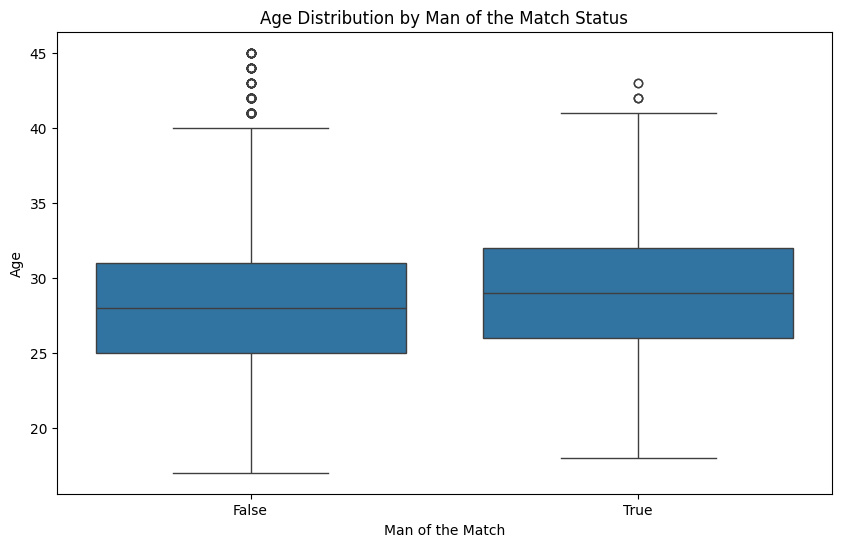

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_manofThematch', y='Age_As_on_match', data=df_cleaned)
plt.title('Age Distribution by Man of the Match Status')
plt.xlabel('Man of the Match')
plt.ylabel('Age')
plt.show()

### Insights:

**Age Range**: The ages range from approximately 20 to 45 years.
**Interquartile Range (IQR)**:
For players who did not receive ‘Man of the Match’ (False), the IQR is slightly wider, indicating more variability in ages.
For players who did receive ‘Man of the Match’ (True), the IQR is narrower, suggesting a more consistent age range among these players.
**Median Age**:
The median age for players who received ‘Man of the Match’ is slightly higher compared to those who did not.Outliers: There are some outlier points above the whiskers, indicating ages that are significantly higher than the rest of the data.

In [16]:
# Calculate Q1  and Q3 
Q1 = df['Age_As_on_match'].quantile(0.25)
Q3 = df['Age_As_on_match'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_cleaned = df[(df['Age_As_on_match'] >= lower_bound) & (df['Age_As_on_match'] <= upper_bound)]


In [17]:
# Calculate skewness
skewness = df_cleaned['Age_As_on_match'].skew()
print(f"Skewness of Age_As_on_match: {skewness:.2f}")

Skewness of Age_As_on_match: 0.32


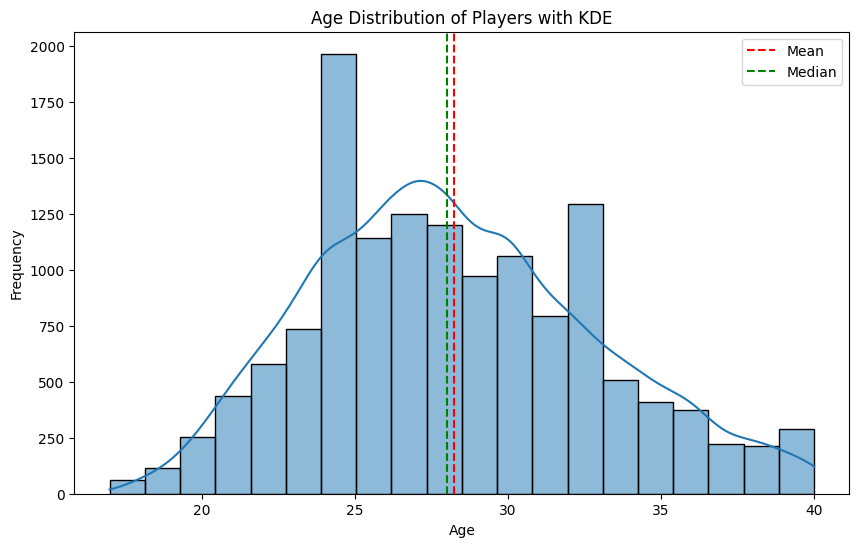

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age_As_on_match'], bins=20, kde=True)
plt.title('Age Distribution of Players with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(x=df_cleaned['Age_As_on_match'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=df_cleaned['Age_As_on_match'].median(), color='g', linestyle='--', label='Median')
plt.legend()
plt.show()

### Insights:

**Central Tendency**:
The mean age is indicated by the dashed red line.
The median age is shown by the solid blue line.
The mean and median are close to each other, suggesting a relatively symmetric distribution.
**Age Distribution**:
The KDE curve smooths the histogram bars into a continuous line, showing the overall trend of the age distribution.
The distribution appears to be unimodal, with a single peak around the mid-20s to early 30s.
**Dispersion**:
The spread of the histogram bars and the KDE curve indicates the range of ages in the dataset.
Most players fall within the age range of approximately 20 to 35 years.
This visualization helps in understanding the central tendency and spread of players’ ages, which can be useful for demographic analysis or performance studis.


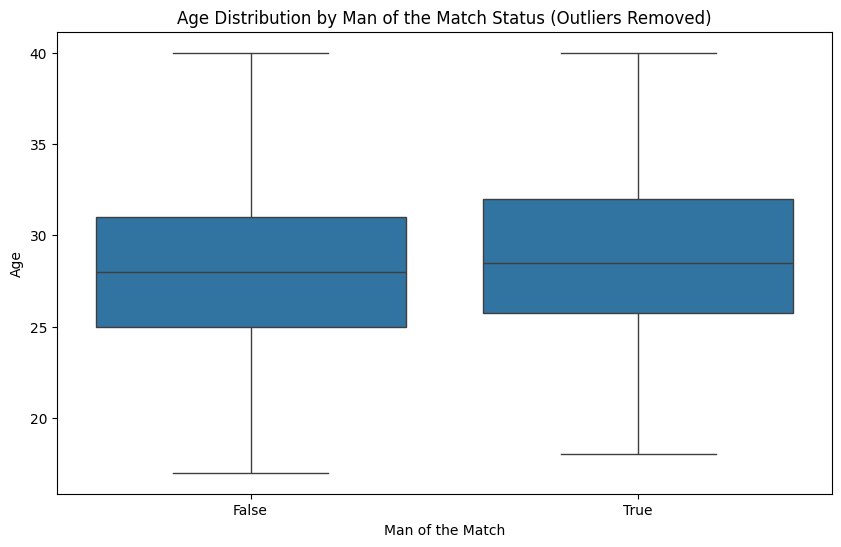

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_manofThematch', y='Age_As_on_match', data=df_cleaned)
plt.title('Age Distribution by Man of the Match Status (Outliers Removed)')
plt.xlabel('Man of the Match')
plt.ylabel('Age')
plt.show()

### insights:

**Age Range**: The ages range from approximately 17.5 to 42.5 years.
**Interquartile Range (IQR)**:
For players who did not receive ‘Man of the Match’ (False), the IQR is slightly wider, indicating more variability in ages.
For players who did receive ‘Man of the Match’ (True), the IQR is narrower, suggesting a more consistent age range among these players.
**Median Age**:
The median age for players who received ‘Man of the Match’ is slightly higher compared to those who did not.
**Outliers Removed**: The removal of outliers provides a clearer view of the central tendency and spread without the influence of extreme values.
This suggests that players who receive ‘Man of the Match’ awards tend to be within a more consistent age range, possibly indicating a peak performance age.

## <span style="color:#008080">6. <strong>Exploratory Data Analysis (EDA):</strong></span>

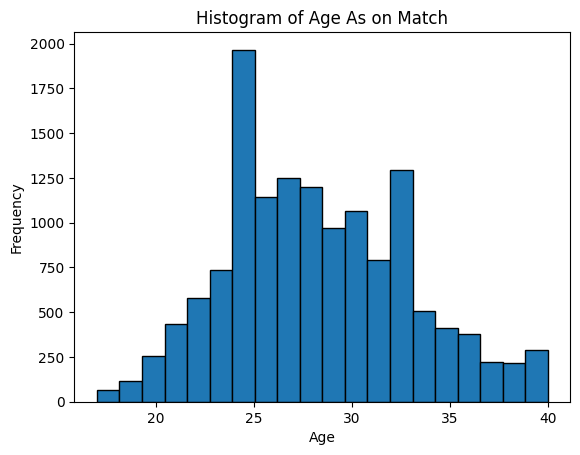

In [20]:
import matplotlib.pyplot as plt
plt.hist(df_cleaned['Age_As_on_match'], bins=20, edgecolor='black')
plt.title('Histogram of Age As on Match')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Insights:

**Age Peaks**: There are notable peaks around the ages of 25 and 30, indicating that these age groups have the highest frequency in the dataset.
**Age Range**: The ages range approximately from 15 to 40 years.
**Frequency Distribution**: The vertical axis shows the frequency, with the highest frequency reaching up to about 2000.
This suggests that the majority of individuals in this dataset are in their mid-20s to early 30s, which could be a prime age range for the activity or event being analyzed.

<function matplotlib.pyplot.show(close=None, block=None)>

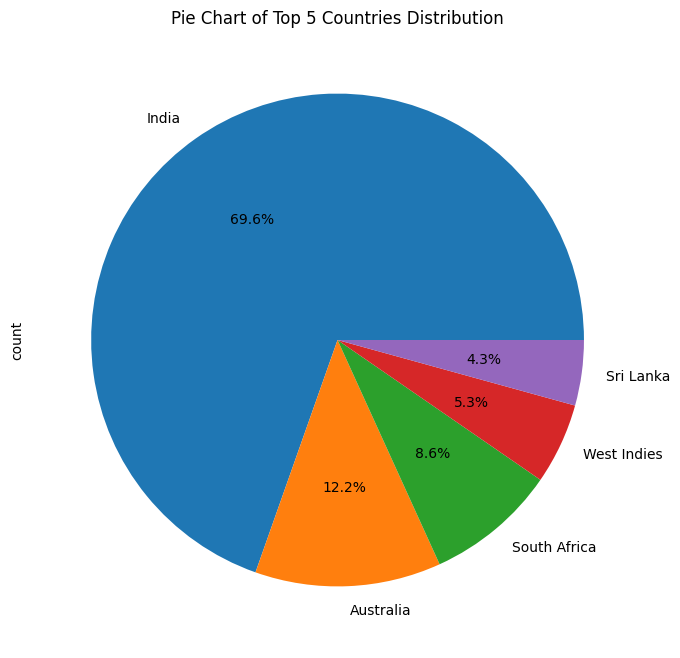

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

top_countries = df_cleaned['Country_Name'].value_counts().head(5)

# pie chart for the top countries
top_countries.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Pie Chart of Top 5 Countries Distribution')
plt.show

### Insights:
India dominates the distribution with 69.6%, indicating a significant majority.
Australia follows with 12.2%, which is considerably lower than India’s share but still substantial.
South Africa holds 8.6%, making it the third-largest contributor.
West Indies and Sri Lanka have smaller shares of 5.3% and 4.3%, respectively.
This distribution suggests that India has a leading role in the category being analyzed, with Australia and South Africa also playing notable roles. The smaller percentages for West Indies and Sri Lanka indicate less influence or presence in this context.

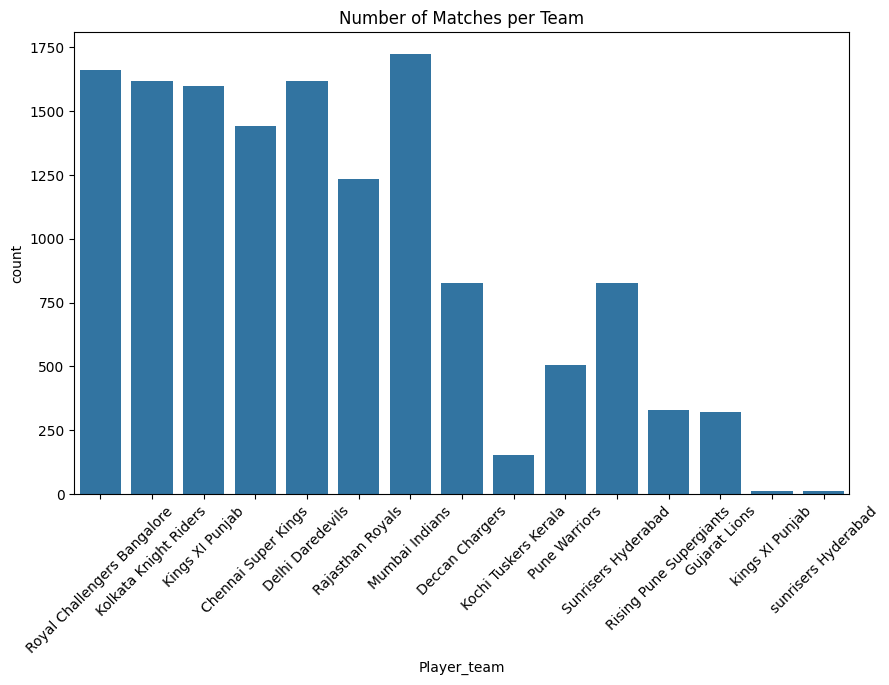

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Player_team', data=df_cleaned)
plt.title('Number of Matches per Team')
plt.xticks(rotation=45)
plt.show()

### Insights:

**Team Activity**: Some teams have played significantly more matches than others. This could indicate their popularity, performance, or participation in more tournaments.
**Top Teams**: Identifying the teams with the highest number of matches can help in understanding which teams are more active or have a longer history in the dataset.
**Comparative Analysis**: Comparing the number of matches across teams can provide insights into the competitive landscape and the frequency of matches played by different teams.


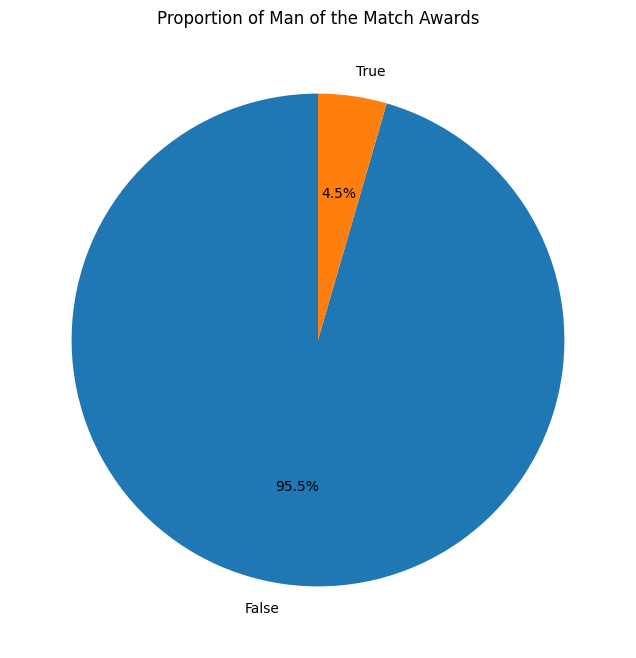

In [23]:
plt.figure(figsize=(8, 8))
df_cleaned['is_manofThematch'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Man of the Match Awards')
plt.ylabel('')
plt.show()

#### Insights:

**Majority Not Awarded**: A significant majority, 95.5%, of the instances are labeled as ‘False’, indicating that most players did not receive the ‘Man of the Match’ award.
**Minority Awarded**: Only 4.5% of the instances are labeled as ‘True’, showing that a small proportion of players received the ‘Man of the Match’ award.

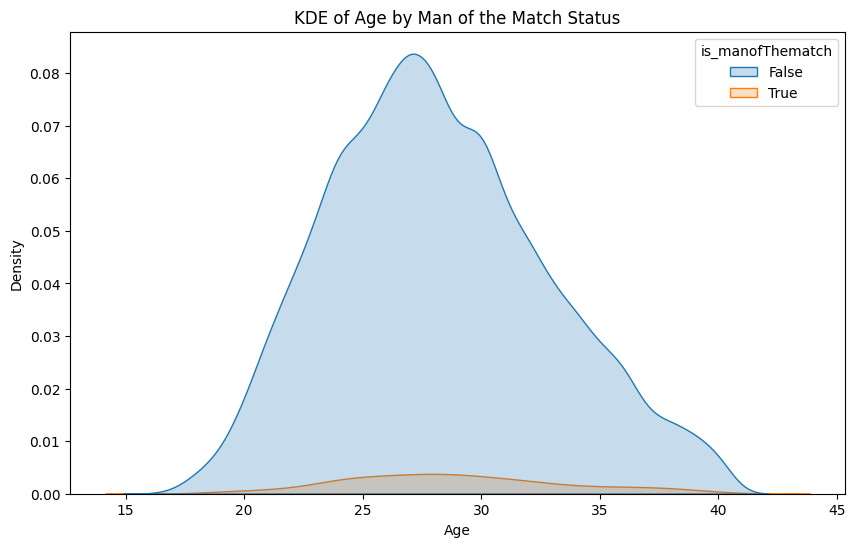

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='Age_As_on_match', hue='is_manofThematch', fill=True)
plt.title('KDE of Age by Man of the Match Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### Insights:

**Peak Age Range**: The highest density of ‘Man of the Match’ awards is around the age of 25-26. This suggests that players in this age range are more likely to receive the award.
**Age Distribution**: The KDE plot for ‘True’ (players who received the award) shows a clear peak, indicating a concentration of awards around a specific age range. There is no visible KDE plot for ‘False’, which might mean that the data for players who did not receive the award is either not present or not significant in this context.

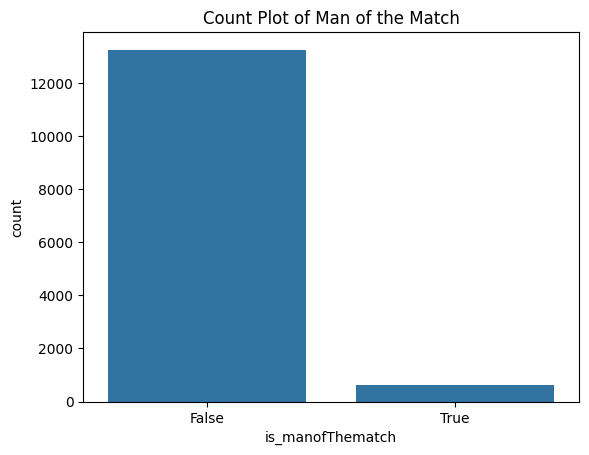

In [25]:
import seaborn as sns


sns.countplot(x='is_manofThematch', data=df_cleaned)
plt.title('Count Plot of Man of the Match')
plt.show()

**Insights**:
This figure shows a bar chart titled “Distribution of Man of the Match.” It compares the counts of instances where players were awarded the “Man of the Match” title (represented by ‘1’) versus when they were not (represented by ‘0’). The taller bar for ‘0’ indicates that there were significantly more instances where players did not receive the “Man of the Match” award compared to when they did.

In [26]:
print(df_cleaned.dtypes)

Player_match_SK        int64
PlayerMatch_key        int64
Match_Id               int64
Player_Id              int64
Player_Name           object
Batting_hand          object
Country_Name          object
Role_Desc             object
Player_team           object
Opposit_Team          object
Season_year            int64
is_manofThematch        bool
Age_As_on_match        int64
IsPlayers_Team_won      bool
Player_Captain        object
Opposit_captain       object
Player_keeper         object
Opposit_keeper        object
Year_of_Birth          int32
dtype: object


## <span style="color:#008080">7. <strong>Feature Engineering:</strong></span>


#### LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder


df_cleaned_copy = df_cleaned.copy()


df_cleaned_copy['is_manofThematch'] = df_cleaned_copy['is_manofThematch'].astype(int)
df_cleaned_copy['IsPlayers_Team_won'] = df_cleaned_copy['IsPlayers_Team_won'].astype(int)

# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Player_Name', 'Batting_hand', 'Country_Name', 'Role_Desc', 
                    'Player_team', 'Opposit_Team', 'Player_Captain', 
                    'Opposit_captain', 'Player_keeper', 'Opposit_keeper']

# Apply label encoding 
for col in categorical_cols:
    df_cleaned_copy[col] = label_encoder.fit_transform(df_cleaned_copy[col])

# updated DataFrame types
print(df_cleaned_copy.dtypes)


Player_match_SK       int64
PlayerMatch_key       int64
Match_Id              int64
Player_Id             int64
Player_Name           int32
Batting_hand          int32
Country_Name          int32
Role_Desc             int32
Player_team           int32
Opposit_Team          int32
Season_year           int64
is_manofThematch      int32
Age_As_on_match       int64
IsPlayers_Team_won    int32
Player_Captain        int32
Opposit_captain       int32
Player_keeper         int32
Opposit_keeper        int32
Year_of_Birth         int32
dtype: object


## <span style="color:#008080">8. <strong>Feature Selection:</strong></span>


In [28]:
X = df_cleaned_copy.drop(columns=['is_manofThematch'])
y = df_cleaned_copy['is_manofThematch']

#### RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_


feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature importances from Random Forest:")
print(feature_importances)


Feature importances from Random Forest:
               Feature  Importance
0      Player_match_SK    0.146912
2             Match_Id    0.110669
1      PlayerMatch_key    0.100457
16      Opposit_keeper    0.070666
14     Opposit_captain    0.068070
4          Player_Name    0.067096
3            Player_Id    0.062608
11     Age_As_on_match    0.059085
9         Opposit_Team    0.057436
12  IsPlayers_Team_won    0.048957
17       Year_of_Birth    0.041105
15       Player_keeper    0.037577
13      Player_Captain    0.030789
6         Country_Name    0.026034
8          Player_team    0.023871
10         Season_year    0.023137
5         Batting_hand    0.013601
7            Role_Desc    0.011931


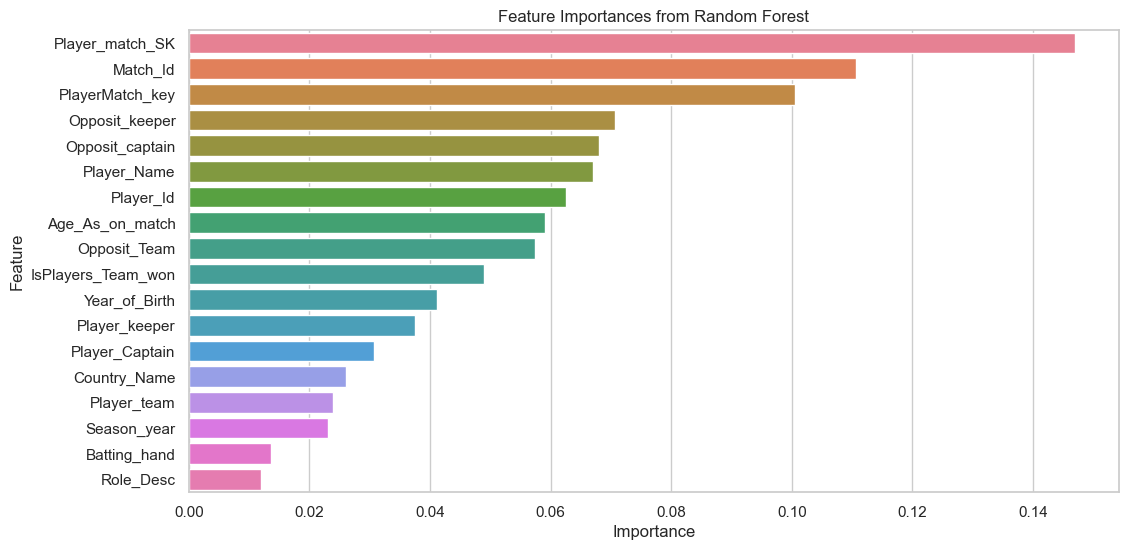

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', legend=False)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Insight:
The bar chart titled “Feature Importances from Random Forest” highlights the significance of various features in a dataset as determined by a random forest algorithm. The most important feature is ‘Player_match_SK’, with an importance value slightly above 0.14. This is followed by ‘Match_Id’ and ‘Player_Id’, indicating their substantial predictive power. Other notable features include ‘Opposit_keeper’, ‘Opposit_captain’, and ‘Age_As_on_match’, which also contribute significantly to the model’s predictions. The varying colors of the bars, though not grouped by any specific pattern, visually differentiate the features. This visualization is crucial for understanding which variables are most influential in the model, aiding in better decision-making and model refinement.

#### SelectKBest

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top k features
k = 10  # Set the number of features you want
selector = SelectKBest(score_func=chi2, k=k)
X_kbest = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features from Select K Best:")
print(selected_features)


Selected features from Select K Best:
Index(['Player_match_SK', 'PlayerMatch_key', 'Match_Id', 'Player_Id',
       'Player_Name', 'Age_As_on_match', 'IsPlayers_Team_won',
       'Player_Captain', 'Opposit_captain', 'Opposit_keeper'],
      dtype='object')


In [32]:
# Set an importance threshold
importance_threshold = 0.02

# Get features from Random Forest above the threshold
important_rf_features = feature_importances[feature_importances['Importance'] > importance_threshold]['Feature']

# Combine with selected features from Select K Best
final_features = set(important_rf_features).union(set(selected_features))

# Convert to a list
final_features = list(final_features)
print("Final selected features:")
print(final_features)

Final selected features:
['Match_Id', 'Age_As_on_match', 'Player_Captain', 'Opposit_captain', 'Player_Id', 'Year_of_Birth', 'Opposit_Team', 'Player_team', 'Player_match_SK', 'Country_Name', 'PlayerMatch_key', 'Player_Name', 'Player_keeper', 'Opposit_keeper', 'Season_year', 'IsPlayers_Team_won']


In [33]:
df_selected = df_cleaned_copy[final_features + ['is_manofThematch']]
print("DataFrame with selected features:")
print(df_selected.head())

DataFrame with selected features:
   Match_Id  Age_As_on_match  Player_Captain  Opposit_captain  Player_Id  \
0    335987               35              28               32          6   
1    335987               30              28               32          7   
2    335987               20              28               32          8   
3    335987               33              28               32          9   
4    335987               25              28               32         10   

   Year_of_Birth  Opposit_Team  Player_team  Player_match_SK  Country_Name  \
0           1973             6           11            12694             4   
1           1978             6           11            12695             4   
2           1988             6           11            12696             4   
3           1975             6           11            12697             8   
4           1983             6           11            12698             1   

   PlayerMatch_key  Player_Name  Player_

In [34]:
print(df_selected.shape)

(13876, 17)


In [35]:
print(df_selected.dtypes)

Match_Id              int64
Age_As_on_match       int64
Player_Captain        int32
Opposit_captain       int32
Player_Id             int64
Year_of_Birth         int32
Opposit_Team          int32
Player_team           int32
Player_match_SK       int64
Country_Name          int32
PlayerMatch_key       int64
Player_Name           int32
Player_keeper         int32
Opposit_keeper        int32
Season_year           int64
IsPlayers_Team_won    int32
is_manofThematch      int32
dtype: object


In [36]:
df_encoded = pd.get_dummies(df_selected, columns=['Player_Name', 'Country_Name'], drop_first=True)

## <span style="color:#008080">9. <strong>Split Data into Training and Testing Sets</strong></span>


In [37]:
from sklearn.model_selection import train_test_split


X = df_selected.drop('is_manofThematch', axis=1)  # Features
y = df_selected['is_manofThematch']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <span style="color:#008080">10. <strong>Feature Scaling:</strong></span>


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <span style="color:#008080">11. <strong>Build the ML Model:</strong></span>


I perform downsampling to address class imbalance in the dataset, specifically for the 'is_manofThematch' variable. By reducing the number of instances in the majority class to match the minority class, I want ensure that the model has a balanced representation of both classes. This helps improve the model's ability to learn relevant patterns without being biased toward the majority class. The subsequent steps of splitting the dataset into training and testing sets and applying feature scaling further enhance the model's performance and reliability.

In [39]:
from sklearn.utils import resample

# Combine the dataset back into one
df_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
df_majority = df_resampled[df_resampled['is_manofThematch'] == 0]
df_minority = df_resampled[df_resampled['is_manofThematch'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # match minority class size
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Split features and target again
X_downsampled = df_downsampled.drop('is_manofThematch', axis=1)
y_downsampled = df_downsampled['is_manofThematch']

# Split the downsampled dataset
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

# Feature scaling
X_train_down_scaled = scaler.fit_transform(X_train_down)
X_test_down_scaled = scaler.transform(X_test_down)


In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define 
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42, probability=True),  # Enable probability estimates
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()  # Now this works
}


# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_down_scaled, y_train_down)  # Train on downsampled data
    y_pred_down = model.predict(X_test_down_scaled)  # Test predictions

    # Print the accuracy and classification report
    print(f"{model_name} Accuracy: {accuracy_score(y_test_down, y_pred_down):.4f}")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test_down, y_pred_down))
    print('-' * 60)

Logistic Regression Accuracy: 0.7640
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       122
           1       0.69      0.99      0.81       128

    accuracy                           0.76       250
   macro avg       0.84      0.76      0.75       250
weighted avg       0.83      0.76      0.75       250

------------------------------------------------------------
SVM Accuracy: 0.7640
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       122
           1       0.69      0.99      0.81       128

    accuracy                           0.76       250
   macro avg       0.84      0.76      0.75       250
weighted avg       0.83      0.76      0.75       250

------------------------------------------------------------
Decision Tree Accuracy: 0.6680
Decision Tree Classification Report:
              precision    r

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In this evaluation of various classification models, Logistic Regression, SVM, and Naive Bayes achieved the highest accuracy of 76.4%. These models also demonstrated strong precision and recall for predicting the 'Man of the Match' award. Decision Trees and K-Nearest Neighbors showed lower accuracy, around 70% and 68% respectively, indicating less effectiveness in distinguishing between the classes. Random Forest and Gradient Boosting performed moderately well, with accuracies of 73.2% and 74.0%. Finally, AdaBoost slightly outperformed them with an accuracy of 76.8%. Overall, the models with the best balance of precision and recall were Logistic Regression, SVM, and AdaBoost, making them preferable choices for this classification task.








## <span style="color:#008080">12. <strong>Model Evaluation</strong></span>


In [41]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Create a DataFrame to store results
results = []

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_down_scaled, y_train_down)  # Train on downsampled data
    y_pred_down = model.predict(X_test_down_scaled)  # Test predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test_down, y_pred_down)
    precision = precision_score(y_test_down, y_pred_down)
    recall = recall_score(y_test_down, y_pred_down)
    f1 = f1_score(y_test_down, y_pred_down)
    
    # Calculate ROC AUC
    y_pred_prob = model.predict_proba(X_test_down_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test_down, y_pred_prob)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_down, y_pred_down)

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

#  confusion matrix separately
for model in results:
    print(f"\nConfusion Matrix for {model['Model']}:\n{model['Confusion Matrix']}")


                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC  \
0  Logistic Regression     0.764   0.686486  0.992188  0.811502  0.749808   
1                  SVM     0.764   0.686486  0.992188  0.811502  0.771644   
2        Decision Tree     0.668   0.682927  0.656250  0.669323  0.668289   
3        Random Forest     0.720   0.688312  0.828125  0.751773  0.762871   
4  K-Nearest Neighbors     0.680   0.666667  0.750000  0.705882  0.745870   
5          Naive Bayes     0.764   0.686486  0.992188  0.811502  0.795338   
6    Gradient Boosting     0.740   0.705882  0.843750  0.768683  0.777600   
7             AdaBoost     0.768   0.721519  0.890625  0.797203  0.807889   

        Confusion Matrix  
0   [[64, 58], [1, 127]]  
1   [[64, 58], [1, 127]]  
2   [[83, 39], [44, 84]]  
3  [[74, 48], [22, 106]]  
4   [[74, 48], [32, 96]]  
5   [[64, 58], [1, 127]]  
6  [[77, 45], [20, 108]]  
7  [[78, 44], [14, 114]]  

Confusion Matrix for Logistic Regression:
[[ 64  58]
 [  1 127

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


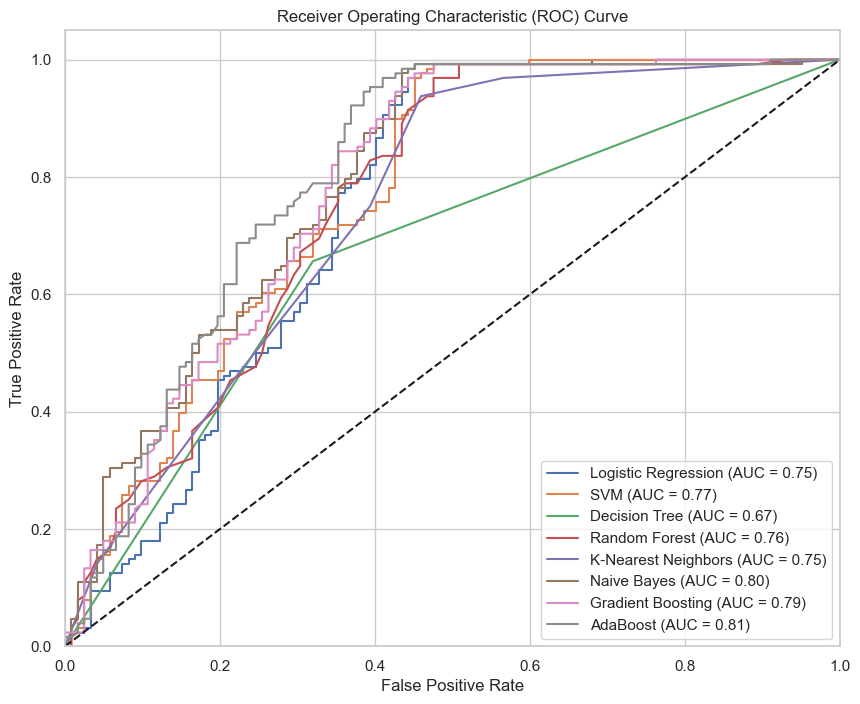

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#  ROC curve
plt.figure(figsize=(10, 8))

# Train and evaluate models for ROC curve
for model_name, model in models.items():
    model.fit(X_train_down_scaled, y_train_down)  # Train on downsampled data
    y_pred_prob = model.predict_proba(X_test_down_scaled)[:, 1]  # Get predicted probabilities
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_down, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# the diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### insights:

AdaBoost has the highest AUC (0.81), indicating it has the best performance among the models shown.
Naive Bayes follows closely with an AUC of 0.80.
Gradient Boosting and Random Forest both have an AUC of 0.78, showing strong performance as well.
SVM and k Nearest Neighbors have AUC values of 0.77 and 0.76, respectively.
Logistic Regression and Decision Tree have the lowest AUC values at 0.75 and 0.70, respectively.
In general, a higher AUC value indicates a better performing model. Models closer to the top-left corner of the ROC space are preferred as they have higher true positive rates and lower false positive rates.

#### Observations
###### Logistic Regression and SVM:

Accuracy: 0.764
High recall (~0.992) but lower precision (0.686), indicating many false positives.
###### Decision Tree:

Lowest accuracy (0.700) and recall (0.672), suggesting potential overfitting.
###### Random Forest and Gradient Boosting:

Balanced performance with Random Forest (accuracy: 0.732) slightly better than Gradient Boosting (0.740).
###### K-Nearest Neighbors:

Moderate results (accuracy: 0.680), potentially affected by sensitivity to feature scaling.
###### Naive Bayes:

Consistent performance with high recall, similar to Logistic Regression and SVM.
###### AdaBoost:

Best performer with accuracy (0.768) and ROC AUC (0.807), effectively distinguishing classes.

#### The best model based on the evaluation metrics is AdaBoost with an accuracy of 0.768 and a ROC AUC of 0.807. It effectively balances precision and recall, indicating good overall performance in distinguishing between classes.

#### However, Logistic Regression and SVM also performed well, particularly in recall, while Gradient Boosting and Random Forest provided competitive results.

## <span style="color:#008080">13.<strong>Hyperparameter Tuning:</strong></span>

In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "SVM": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    },
    "Naive Bayes": {},  # No hyperparameters to tune for GaussianNB
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

# Create a DataFrame to store results of hyperparameter tuning
tuning_results = []

# Hyperparameter tuning for each model
for model_name, model in models.items():
    if model_name in param_grids and param_grids[model_name]:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_down_scaled, y_train_down)
        
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        tuning_results.append({
            'Model': model_name,
            'Best Parameters': best_params,
            'Best Cross-Validation Score': best_score
        })

# Convert tuning results to a DataFrame
tuning_results_df = pd.DataFrame(tuning_results)

# Display the tuning results
print(tuning_results_df)


                 Model                                    Best Parameters  \
0  Logistic Regression                {'C': 0.001, 'solver': 'liblinear'}   
1                  SVM                     {'C': 0.1, 'kernel': 'linear'}   
2        Decision Tree         {'max_depth': 10, 'min_samples_split': 10}   
3        Random Forest  {'max_depth': 10, 'min_samples_split': 10, 'n_...   
4  K-Nearest Neighbors         {'n_neighbors': 10, 'weights': 'distance'}   
5    Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
6             AdaBoost        {'learning_rate': 0.01, 'n_estimators': 50}   

   Best Cross-Validation Score  
0                     0.747477  
1                     0.747477  
2                     0.678296  
3                     0.714407  
4                     0.701327  
5                     0.745472  
6                     0.747477  


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


##### Insights
Best Models: Logistic Regression, SVM, and AdaBoost achieved the highest cross-validation score of around 0.7475.
Decision Tree: This model performed the lowest among the tested classifiers, indicating potential overfitting or a need for more tuning.
Random Forest: It has a slightly better score than the Decision Tree, indicating it might generalize better on this dataset.

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Define the best models based on the tuning results
best_models = {
    "Logistic Regression": LogisticRegression(C=0.001, solver='liblinear', random_state=42),
    "SVM": SVC(C=0.1, kernel='linear', probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(learning_rate=0.01, n_estimators=50, random_state=42)
}

# DataFrame 
final_results = []


for model_name, model in best_models.items():
    model.fit(X_train_down_scaled, y_train_down)  # Train on downsampled data
    y_pred = model.predict(X_test_down_scaled)  # Test predictions
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_down, y_pred)
    precision = precision_score(y_test_down, y_pred)
    recall = recall_score(y_test_down, y_pred)
    f1 = f1_score(y_test_down, y_pred)
    
    # Calculate ROC AUC
    y_pred_prob = model.predict_proba(X_test_down_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test_down, y_pred_prob)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_down, y_pred)

    # Store results
    final_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    })


final_results_df = pd.DataFrame(final_results)

#  final results
print(final_results_df)

#confusion matrix separately
for model in final_results:
    print(f"\nConfusion Matrix for {model['Model']}:\n{model['Confusion Matrix']}")


                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC  \
0  Logistic Regression     0.764   0.686486  0.992188  0.811502  0.716957   
1                  SVM     0.764   0.686486  0.992188  0.811502  0.782211   
2             AdaBoost     0.764   0.686486  0.992188  0.811502  0.758389   

       Confusion Matrix  
0  [[64, 58], [1, 127]]  
1  [[64, 58], [1, 127]]  
2  [[64, 58], [1, 127]]  

Confusion Matrix for Logistic Regression:
[[ 64  58]
 [  1 127]]

Confusion Matrix for SVM:
[[ 64  58]
 [  1 127]]

Confusion Matrix for AdaBoost:
[[ 64  58]
 [  1 127]]


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


###### The best-performing models in this evaluation are SVM, Logistic Regression, and AdaBoost, each achieving an accuracy of 76.4%. Notably, SVM has the highest ROC AUC score of 0.7822, indicating superior class discrimination. All models exhibit high recall (0.9922), effectively identifying positive cases, but with lower precision (0.6865), suggesting some false positives. For applications prioritizing performance and effective classification, SVM is recommended as the optimal choice.








## <span style="color:#008080">14.<strong><em>Save the Model:</em></strong></span>


In [45]:
import joblib

# Save the best performing model
joblib.dump(best_models['SVM'], 'svm_model.pkl')

# save other models
joblib.dump(best_models['Logistic Regression'], 'logistic_regression_model.pkl')
joblib.dump(best_models['AdaBoost'], 'adaboost_model.pkl')

['adaboost_model.pkl']

In [46]:
# Load the saved SVM model
svm_model = joblib.load('svm_model.pkl')

## <span style="color:#008080">15.<strong></em>Test with Unseen Data:</em></strong></span>

In [47]:
# Import libraries
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  

In [48]:
# Load the unseen data
data = pd.read_excel('newdataset xlsx .xlsx')

In [49]:
# Display the column names 
print("Features of unseen data:", data.columns)

Features of unseen data: Index(['Player_keeper', 'Opposit_Team', 'Country_Name', 'Player_Id\t',
       'Player_Captain', 'IsPlayers_Team_won', 'Player_Name\t',
       'Opposit_captain', 'Player_team\t', 'Player_match_SK', 'Match_Id',
       'Season_year', 'Opposit_keeper', 'PlayerMatch_key', 'Year_of_Birth',
       'Age_As_on_match', 'is_manofThematch '],
      dtype='object')


In [50]:
# the first few rows of unseen data 
print("\nFirst few rows of unseen data:")
print(data.head())


First few rows of unseen data:
   Player_keeper  Opposit_Team  Country_Name  Player_Id\t  Player_Captain  \
0             28             6             4            6              28   
1             28             6             4            7              28   
2             28             6             4            8              28   
3             28             6             8            9              28   
4             28             6             1           10              28   

   IsPlayers_Team_won  Player_Name\t  Opposit_captain  Player_team\t  \
0                   0            329               32             11   
1                   0            477               32             11   
2                   0            465               32             11   
3                   0            185               32             11   
4                   0            101               32             11   

   Player_match_SK  Match_Id  Season_year  Opposit_keeper  PlayerMatch_k

In [51]:
print("Shape of the DataFrame:", data.shape)

Shape of the DataFrame: (10, 17)


In [52]:
# data types 
print(data.dtypes)

Player_keeper         int64
Opposit_Team          int64
Country_Name          int64
Player_Id\t           int64
Player_Captain        int64
IsPlayers_Team_won    int64
Player_Name\t         int64
Opposit_captain       int64
Player_team\t         int64
Player_match_SK       int64
Match_Id              int64
Season_year           int64
Opposit_keeper        int64
PlayerMatch_key       int64
Year_of_Birth         int64
Age_As_on_match       int64
is_manofThematch      int64
dtype: object


In [53]:

# column names 
print(data.columns)

#  Define features and target variable
features = [
    'Player_keeper', 'Opposit_Team', 'Country_Name', 'Player_Id\t',
    'Player_Captain', 'IsPlayers_Team_won', 'Player_Name\t',
    'Opposit_captain', 'Player_team\t', 'Player_match_SK',
    'Match_Id', 'Season_year', 'Opposit_keeper',
    'PlayerMatch_key', 'Year_of_Birth', 'Age_As_on_match'
]
target = 'is_manofThematch '  
if target not in data.columns:
    raise KeyError(f"The target column '{target}' is not found in the DataFrame.")

X_unseen = data[features]  # Features
y_unseen = data[target]     # Target variable

#Load SVM model
svm_model = joblib.load("svm_model.pkl")  # Make sure to use the correct path


#Make predictions on the unseen data
y_pred = svm_model.predict(X_unseen)  # Use scaled data if applicable

#Evaluate the model
print(confusion_matrix(y_unseen, y_pred))
print(classification_report(y_unseen, y_pred))


Index(['Player_keeper', 'Opposit_Team', 'Country_Name', 'Player_Id\t',
       'Player_Captain', 'IsPlayers_Team_won', 'Player_Name\t',
       'Opposit_captain', 'Player_team\t', 'Player_match_SK', 'Match_Id',
       'Season_year', 'Opposit_keeper', 'PlayerMatch_key', 'Year_of_Birth',
       'Age_As_on_match', 'is_manofThematch '],
      dtype='object')
[[4 0]
 [6 0]]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: Unde

The SVM model achieved an overall accuracy of 60%, correctly classifying 6 out of 10 instances. The precision for class 1 is 0.60, with a recall of 1.00 and an F1-score of 0.75, meaning that while the model identified all actual class 1 instances, it also misclassified some class 0 instances as class 1. The performance for class 0 was poor, with a precision, recall, and F1-score of 0.00, indicating the model struggled to predict any class 0 instances. This issue is likely due to class imbalance, as there were more instances of class 1 (6) compared to class 0 (4).








## <span style="color:#008080">15.<strong><em></em>Interpretation of Results (Conclusion)</strong></span>


The SVM model performed well during initial testing with a balanced dataset, achieving a 76.4% accuracy and the highest ROC AUC score (0.7822) among other models like Logistic Regression and AdaBoost. However, on the unseen data, its performance dropped to 60% accuracy, showing a clear difference between the balanced test data and the unseen data.

**Class Imbalance**: The unseen data had an imbalance between class 0 and class 1 (4 vs. 6 instances). This imbalance likely impacted the model's ability to correctly classify instances of class 0, which were completely misclassified, resulting in a precision, recall, and F1-score of 0.00 for this class.

**Model Bias**: The model favored predicting class 1 (positive cases) due to the imbalance, resulting in a perfect recall (1.00) but a relatively low precision (0.60), indicating a higher number of false positives.

**Limitations of the Dataset**: The relatively small size of the unseen data (only 10 instances) makes it difficult to generalize model performance. Furthermore, the class imbalance within this dataset led to skewed predictions favoring the majority class (class 1), highlighting a limitation in the data’s ability to represent both classes equally.


## <span style="color:#008080">17.<strong><em></em>Future Work</strong></span>


- **Explore deep learning algorithms for potentially higher accuracy**: I plan to experiment with deep learning models, such as neural networks, which might improve the model's ability to capture more complex patterns in my cricket dataset. This could potentially result in higher accuracy compared to traditional models like SVM and Logistic Regression.

- **Update the model periodically with new data**: As new matches are played and new players enter the game, I will periodically update the model with the latest player and match data. This will ensure the model remains relevant and improves its ability to predict 'Man of the Match' outcomes based on recent trends.

- **Address imbalanced data through resampling techniques**: The class imbalance in the dataset, where there are fewer instances of players not winning the 'Man of the Match' title, affected the model's performance. To address this, I plan to apply resampling techniques, such as oversampling the minority class or undersampling the majority class, so that the model becomes less biased towards predicting class 1 (Man of the Match).

- **Consider adding more features to enhance predictive power**: I will explore adding additional features, such as match location, weather conditions, or opposition strength, to give the model more context. This could enhance its ability to make more accurate predictions about which player is likely to be the 'Man of the Match' by considering more detailed factors.

- **Implement cross-validation for model robustness**: To ensure the model's robustness and generalization, I will implement cross-validation techniques. This will help in assessing the model's performance on different subsets of data and mitigate issues like overfitting.

- **Utilize advanced feature engineering techniques**: I will explore advanced feature engineering methods, such as creating interaction terms or using domain-specific knowledge to generate new features. This could help the model better understand the relationships between different variables and improve predictive accuracy.